In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [3]:
!kaggle datasets download -d vidushi312000/Faces-dataset

 98% 408M/415M [00:07<00:00, 92.8MB/s]
100% 415M/415M [00:07<00:00, 57.4MB/s]


In [4]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset_face_recognition/train/not_me_/4047.jpg  
  inflating: dataset_face_recognition/train/not_me_/4049.jpg  
  inflating: dataset_face_recognition/train/not_me_/405.jpg  
  inflating: dataset_face_recognition/train/not_me_/4051.jpg  
  inflating: dataset_face_recognition/train/not_me_/4052.jpg  
  inflating: dataset_face_recognition/train/not_me_/4053.jpg  
  inflating: dataset_face_recognition/train/not_me_/4055.jpg  
  inflating: dataset_face_recognition/train/not_me_/4056.jpg  
  inflating: dataset_face_recognition/train/not_me_/4057.jpg  
  inflating: dataset_face_recognition/train/not_me_/4058.jpg  
  inflating: dataset_face_recognition/train/not_me_/4059.jpg  
  inflating: dataset_face_recognition/train/not_me_/406.jpg  
  inflating: dataset_face_recognition/train/not_me_/4060.jpg  
  inflating: dataset_face_recognition/train/not_me_/4061.jpg  
  inflating: dataset_face_recognition/train/not_me_/4062.jpg  
  infl

In [5]:
%reload_ext autoreload
import numpy as np
#!pip install "torch==1.4" "torchvision==0.5.0"
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
img_counter=[]
img_counter.append(1)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [7]:
path=Path("dataset_face_recognition/train")
classes=['my_pictures_','not_me_']
for c in classes:
    #print(c)
    verify_images(path/c, delete=True, max_size=500)
    

In [8]:
classes=['my_pictures_','not_me_']
for c in classes:
    #print("true")
    for path,dirs,files in os.walk('/content/dataset_face_recognition/train/'+c):
      onlyfiles=files
      dirr='/content/dataset_face_recognition/train/'+c
      for filename in onlyfiles:
        if(filename.endswith('.jpg')):
          path=os.path.join(dirr,filename)
          img1=open_image(path)
          try:
             img= face_finder(path)
             img1=img[0]
             img1.save(path)
          except:
            pass

In [9]:
bs=4
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("dataset_face_recognition"), valid_pct=0.2, bs=4, size=224, ds_tfms=get_transforms())

In [10]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [11]:
resnet_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.422560,0.078519,0.989661,08:43
1,0.231901,0.070942,0.990441,08:42
2,0.208520,0.055623,0.991611,08:42
3,0.199115,0.053570,0.991416,08:39


In [12]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
os.makedirs("/content/drive/My Drive/dl_projects/FaceRecognition",exist_ok=True)

In [14]:
my_dir="/content/drive/My Drive/dl_projects/FaceRecognition"

In [15]:
resnet_learn.save(my_dir+"/resnet_Stage-1")

In [16]:
resnet_learn.export(my_dir+"/export.pkl")

In [17]:
!pip install -U kora
from kora.drive import upload_public

In [19]:
url = upload_public('/content/drive/My Drive/dl_projects/FaceRecognition/export.pkl')
url

'https://drive.google.com/uc?id=18_ECEHDrqPP74DHeqK1gVJvYdkgVDsOM'

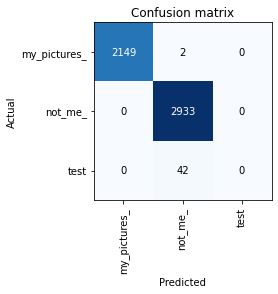

In [20]:
interpretation = ClassificationInterpretation.from_learner(resnet_learn)
interpretation.plot_confusion_matrix()